In [46]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

from utils.analysys_utils import list_experiments_in_dir

In [6]:
experiments_path = os.path.join(os.getcwd(), "derivative_reg", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)

# sort experiments by derivative regularization term
experiments.sort(key=lambda exp: exp['settings']['der_1st_reg'])

In [88]:
# generate data for graphs

# take as baseline the exp with 0. regularization
base_val_loss = experiments[0]['final']['best_epoch']['val_loss']
base_der_loss = 0.

# use value of derivative regularization as x axis
x_axis = []
val_losses = []
der_losses = []
indices = []
for exp in experiments:
    der_1st_reg = exp['settings']['der_1st_reg']
    if der_1st_reg == 0.:
        continue

    x_axis.append(der_1st_reg)

    val_loss = exp['final']['best_epoch']['val_loss']
    val_losses.append(val_loss)

    # normalize w.r.t. regularization weight
    der_1st_loss = exp['final']['best_epoch']['losses']['der_1st'] / der_1st_reg
    der_losses.append(der_1st_loss)

    val_gain = base_val_loss - val_loss
    indices.append(val_gain / -math.log10(der_1st_loss))


data = {"der_reg": x_axis, "validation": val_losses, "derivative": der_losses, "index": indices}

data["index"]

[2.6123228543142777e-06,
 -0.09254109363797718,
 -0.09582917397369949,
 0.1724020177847238,
 0.5417108088803525,
 2.4484303727633896,
 103.6510467829531,
 146.06401003270844,
 63.19595010588626,
 38.28308761399048,
 -2406.8708619869144,
 -20007.64527654052,
 -20590.266505252526]

Text(0.5, 1.0, 'Regularization Weight vs Validation Loss')

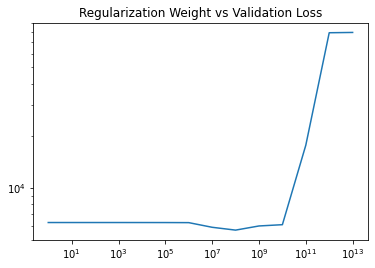

In [58]:
# plot regularization weight vs validation loss
plot = sns.lineplot(data=data, x="der_reg", y="validation")
plot.set(xscale="log", yscale="log")
plot.set_title("Regularization Weight vs Validation Loss")

[None, None]

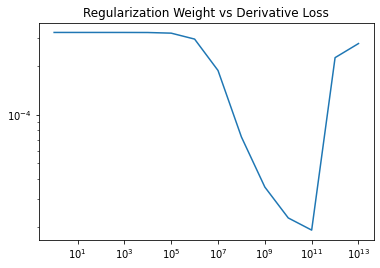

In [59]:
# plot regularization weight vs derivative loss
plot = sns.lineplot(data=data, x="der_reg", y="derivative")
plot.set_title("Regularization Weight vs Derivative Loss")
plot.set(xscale="log", yscale="log")

[None, None]

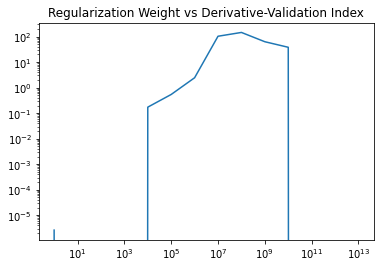

In [86]:
# plot regularization weight vs ratio of validation and derivative loss
plot = sns.lineplot(data=data, x="der_reg", y="index")
plot.set_title("Regularization Weight vs Derivative-Validation Index")
plot.set(xscale="log", yscale="log")